<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Table of Contents <a id="part0"></a>
[Step 1](#part1): Load and Explore the Data

[Step 2](#part2): Data Wrangling on multiple tables

[Step 3](#part3): Data Cleansing and Transformation

[Step 4](#part4): Machine Learning Model

[Report](#part9)

In [1]:
# import the packages
import pandas as pd
import numpy as np
import os
import glob

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from dateutil.relativedelta import *

# sklearn Train test split
from sklearn.model_selection import train_test_split

# feature engine
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer,ArbitraryOutlierCapper
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.encoding import CountFrequencyEncoder


# to impute missing data with sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.imputation import MeanMedianImputer

# Import scaler 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
#PCA
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None  # default='warn'


## Step 1: Load and Explore the Data <a id="part1"></a>
Use the dataset submitted

#### Problem Statement: This project is aimed towards predicting the top half F1 GP winners based on information before the race

In [2]:
#Get all the csv names to make it easier to create dataframes
#Also to see what datasets we have
path = "./datasets/f1db_csv_mod/"
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
  
# loop over the list of csv files
for f in csv_files:
    file=f.split("\\")[-1]
    fullPath=path+file
    print(file.replace("_mod.csv","")+"=pd.read_csv(\""+fullPath+"\")")

circuits=pd.read_csv("./datasets/f1db_csv_mod/circuits_mod.csv")
constructors=pd.read_csv("./datasets/f1db_csv_mod/constructors_mod.csv")
constructor_results=pd.read_csv("./datasets/f1db_csv_mod/constructor_results_mod.csv")
constructor_standings=pd.read_csv("./datasets/f1db_csv_mod/constructor_standings_mod.csv")
drivers=pd.read_csv("./datasets/f1db_csv_mod/drivers_mod.csv")
driver_standings=pd.read_csv("./datasets/f1db_csv_mod/driver_standings_mod.csv")
lap_times=pd.read_csv("./datasets/f1db_csv_mod/lap_times_mod.csv")
pit_stops=pd.read_csv("./datasets/f1db_csv_mod/pit_stops_mod.csv")
qualifying=pd.read_csv("./datasets/f1db_csv_mod/qualifying_mod.csv")
races=pd.read_csv("./datasets/f1db_csv_mod/races_mod.csv")
results=pd.read_csv("./datasets/f1db_csv_mod/results_mod.csv")
seasons=pd.read_csv("./datasets/f1db_csv_mod/seasons_mod.csv")
status=pd.read_csv("./datasets/f1db_csv_mod/status_mod.csv")
weather.csv=pd.read_csv("./datasets/f1db_csv_mod/weather.csv")


In [3]:
#Load all the data
circuits=pd.read_csv("./datasets/f1db_csv_mod/circuits_mod.csv")
constructors=pd.read_csv("./datasets/f1db_csv_mod/constructors_mod.csv")
constructor_results=pd.read_csv("./datasets/f1db_csv_mod/constructor_results_mod.csv")
constructor_standings=pd.read_csv("./datasets/f1db_csv_mod/constructor_standings_mod.csv")
drivers=pd.read_csv("./datasets/f1db_csv_mod/drivers_mod.csv")
driver_standings=pd.read_csv("./datasets/f1db_csv_mod/driver_standings_mod.csv")
lap_times=pd.read_csv("./datasets/f1db_csv_mod/lap_times_mod.csv")
pit_stops=pd.read_csv("./datasets/f1db_csv_mod/pit_stops_mod.csv")
qualifying=pd.read_csv("./datasets/f1db_csv_mod/qualifying_mod.csv")
races=pd.read_csv("./datasets/f1db_csv_mod/races_mod.csv")
results=pd.read_csv("./datasets/f1db_csv_mod/results_mod.csv")
seasons=pd.read_csv("./datasets/f1db_csv_mod/seasons_mod.csv")
status=pd.read_csv("./datasets/f1db_csv_mod/status_mod.csv")

#Code used to get weather data is at the end of this page
weather=pd.read_csv("./datasets/f1db_csv_mod/weather.csv")

### EDA <a id="eda"></a>

In [4]:
#To see how many years worth of data we have
years=[]
temp_df=results.merge(right=races,how='left',on='raceId')
for i in list(temp_df['date'].str[-5:].unique()):
    if str(i).replace('/','')=='nan':
        years.append(0)
    else:
        years.append(int(str(i).replace('/','')))
years.sort()
print(years)

[0, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 12005, 12009, 12011, 12015, 12017, 12018, 12020, 12021]


<AxesSubplot:xlabel='position', ylabel='raceId'>

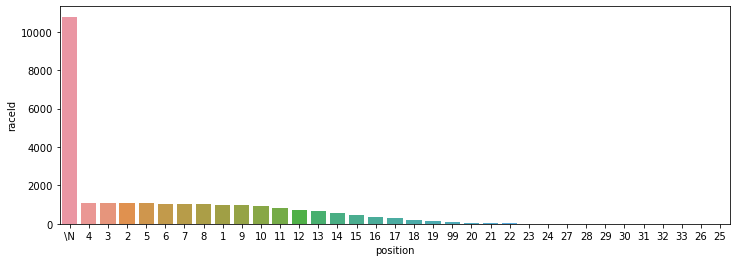

In [5]:
#Number of races by position
temp_df=results.groupby('position').count()
temp_df=temp_df.sort_values(by='raceId',ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=temp_df.index,y='raceId',data=temp_df)

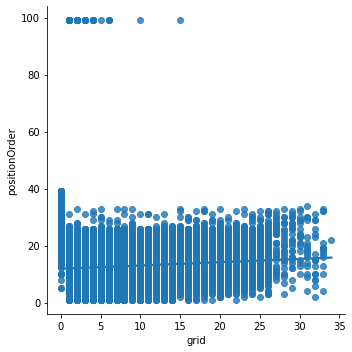

In [6]:
#Grid vs Position
sns.lmplot(x='grid',y='positionOrder',data=results)
#We see that there are some positions that should not be inside
#And there is a positive correlation between grid position and position order

In [7]:
#To see how many years worth of data we have
years=[]
temp_df=qualifying.merge(right=races,how='left',on='raceId')
for i in list(temp_df['date'].str[-5:].unique()):
    if str(i).replace('/','')=='nan':
        years.append(0)
    else:
        years.append(int(str(i).replace('/','')))
years.sort()
print(years)

[0, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 12005, 12009, 12011, 12015, 12017, 12018, 12020, 12021]


<AxesSubplot:xlabel='position', ylabel='raceId'>

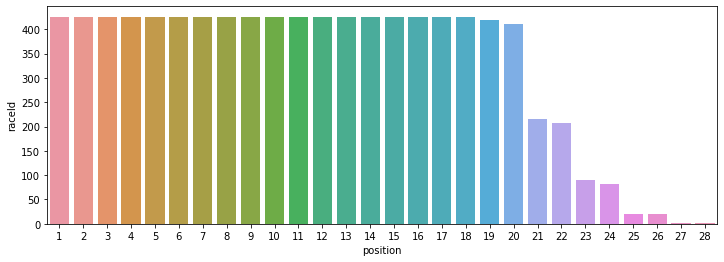

In [8]:
#Number of races by qualifying position
temp_df=qualifying.groupby('position').count()
temp_df=temp_df.sort_values(by='raceId',ascending=False)
plt.figure(figsize=(12,4))
sns.barplot(x=temp_df.index,y='raceId',data=temp_df)

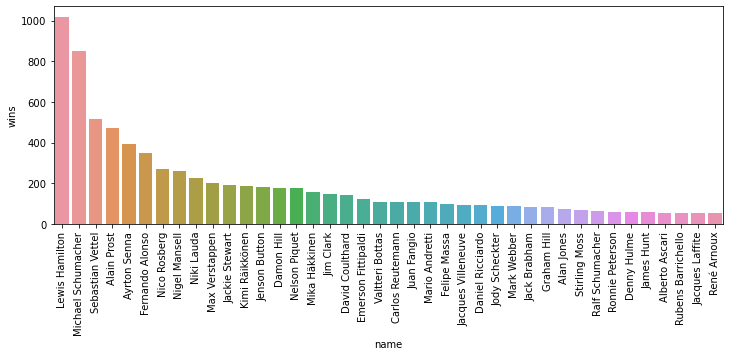

In [9]:
#Driver wins
temp_df=drivers.merge(right=driver_standings,on='driverId',how='left')
temp_df['name']=temp_df['forename']+' '+temp_df['surname']
temp_df=temp_df.groupby('name').sum().sort_values('wins',ascending=False).head(40)
plt.figure(figsize=(12,4))
sns.barplot(x=temp_df.index,y='wins',data=temp_df)
plt.xticks(rotation=90)
plt.show()

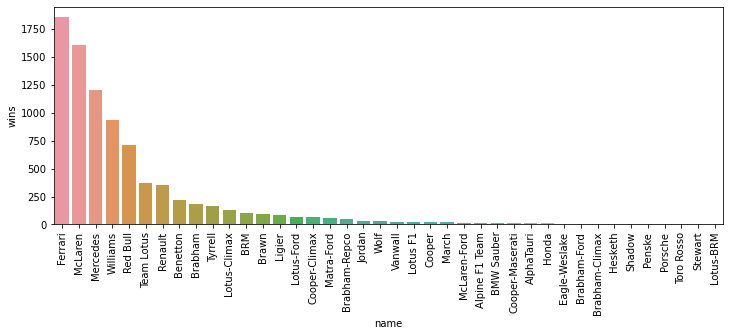

In [10]:
#Constructor wins
temp_df=constructors.merge(right=constructor_standings,on='constructorId',how='left')
temp_df=temp_df.groupby('name').sum().sort_values('wins',ascending=False).head(40)
plt.figure(figsize=(12,4))
sns.barplot(x=temp_df.index,y='wins',data=temp_df)
plt.xticks(rotation=90)
plt.show()

#### [EDA: Age vs Position Order](#age)

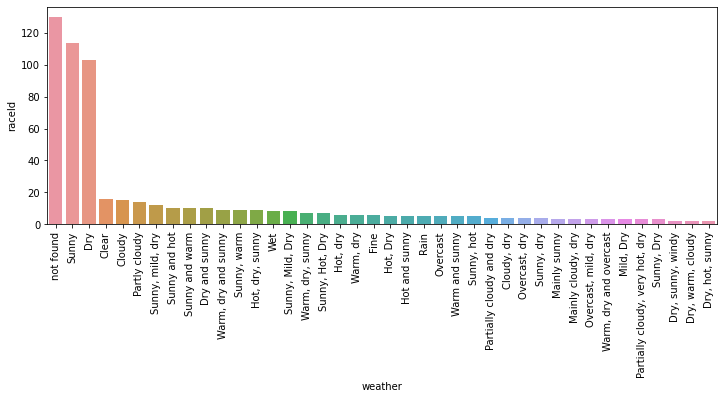

In [11]:
#Number of races by weather
temp_df=weather.groupby('weather').count().sort_values('raceId',ascending=False).head(40)
plt.figure(figsize=(12,4))
sns.barplot(x=temp_df.index,y='raceId',data=temp_df)
plt.xticks(rotation=90)
plt.show()

## Step 2: Data Wrangling on multiple tables <a id="part2"></a>
[Back to the top](#part0)
- Create Season Column
- Rename Columns in tables that will be used 
- Weather OHE
- Merge Datasets
- Feature Engineering
    - Driver's Home
    - Constructor's Home
    - Driver's Age
- Dealing with Position 99
- Create Target Column
- Drop unnecessary columns

##### Create Season Column <a id="part2a"></a>

In [12]:
#To find the invalid Years
#Observation: As we can see the error is just the 1 infront by comparing with year in the url
invalidYears=[]
for i in races[races['date'].notnull()]['date'].unique():
    year=i[i.rfind('/')+1:]
    if(int(year)>2022 or int(year)<1950):
        invalidYears.append(year)
#Replace year in date to the correct year
for i in list(set(invalidYears)):
    races['date'].replace(i,i[1:], regex=True,inplace=True)
#Create season column
races['date']=pd.to_datetime(races['date'])
races['season']=races['date'].dt.year
indexList=races[races['season'].isnull()].index.tolist()#
#Replace null values in season column
index=0
for i in races[races['season'].isnull()]['url']:
    races.loc[indexList[index],'season'] = i[i.rfind("/")+1:i.rfind("/")+5]
    index+=1
races['season']=races['season'].astype('int32')

In [13]:
#To get rid of duplicates if needed(better for testing code)
def merge_fix_cols(company,product,uniqueID):
    
    merged = pd.merge(company,
                         product,
                         how='left',left_on=uniqueID,right_on=uniqueID)    
    for col in merged:
        if col.endswith('_x'):
            merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in merged if col.endswith('_y')]
            merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return merged

##### Rename Columns <a id="part2b"></a>

In [14]:
#Rename
races.rename({"time":"timeOfRace",'name':'race'},axis=1,inplace=True)
results.rename({"time":"finishTime","milliseconds":"finishTime(msec)"},axis=1,inplace=True)
circuits.rename({"name":"circuit",'country':'cirCountry'},axis=1,inplace=True)
qualifying.rename({'position':'qualifyPos'},inplace=True,axis=1)
constructors.rename({"name":"constructor",'nationality':'constructorNationality'},inplace=True,axis=1)
drivers.rename({'nationality':'driverNationality'},inplace=True,axis=1)
weather.rename({'circuit_id':'circuit'},inplace=True,axis=1)

In [15]:
#Get drive full name
drivers['driverName']=drivers['forename']+" "+drivers['surname']

##### Weather OHE <a id="part2i"></a>

In [16]:
weather_dict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'asciutto'],
               'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}
# map new df according to weather dictionary

weather_df = pd.DataFrame(columns = weather_dict.keys())
for col in weather_df:
    weather_df[col] = weather['weather'].map(lambda x: 1 if any(i in weather_dict[col] for i in x.lower().split()) else 0)
   
weather=pd.concat([weather, weather_df], axis = 1)

##### Merge Datasets <a id="part2c"></a>
- Results
- Races
- Circuits
- Constructors
- Drivers
- Qualifying
- Weather

In [17]:
#Merge 
df1=merge_fix_cols(results,races[['raceId','circuitId','season','race','round','date']],"raceId")
df2=merge_fix_cols(df1,circuits[['circuitId',"circuit",'alt','location','cirCountry']],"circuitId")
df3=merge_fix_cols(df2,constructors[['constructorId','constructor','constructorNationality']],"constructorId")
df4=merge_fix_cols(df3,drivers[['driverId','dob','driverNationality','driverName']],"driverId")
df5=pd.merge(df4,qualifying[['raceId','driverId','qualifyPos','q1','q2','q3']],on=['raceId','driverId'],how='inner')
df6=pd.merge(df5,weather,on=['raceId','round','circuitId'],how='inner')

In [18]:
#Merged Dataset
data=df6
years=list(df6['season'].unique())
years.sort()
print("Years:"+str(years))
df6

Years:[1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,qualifyPos,q1,q2,q3,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1,18,1,1,22,1,1,1,1,10.0,...,1,1:26.572,1:25.187,1:26.714,"Clear, dry, air temperature of 39 °C (102 °F).",0,0,0,0,0
1,2,18,2,2,3,5,2,2,2,8.0,...,5,1:25.960,1:25.518,1:27.236,"Clear, dry, air temperature of 39 °C (102 °F).",0,0,0,0,0
2,3,18,3,3,7,7,3,3,3,6.0,...,7,1:26.295,1:26.059,1:28.687,"Clear, dry, air temperature of 39 °C (102 °F).",0,0,0,0,0
3,4,18,4,4,5,11,4,4,4,5.0,...,12,1:26.907,1:26.188,\N,"Clear, dry, air temperature of 39 °C (102 °F).",0,0,0,0,0
4,5,18,5,1,23,3,5,5,5,4.0,...,3,1:25.664,1:25.452,1:27.079,"Clear, dry, air temperature of 39 °C (102 °F).",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,25400,1073,815,9,11,4,15,15,15,0.0,...,4,1:23.350,1:23.135,1:22.947,Clear,1,0,0,0,0
9130,25401,1073,849,3,6,16,\N,R,16,0.0,...,16,1:24.338,\N,\N,Clear,1,0,0,0,0
9131,25402,1073,841,51,99,14,\N,R,17,0.0,...,14,1:24.118,1:24.251,\N,Clear,1,0,0,0,0
9132,25403,1073,847,3,63,17,\N,R,18,0.0,...,17,1:24.423,\N,\N,Clear,1,0,0,0,0


##### Feature Engineering: Create driver home and constructor home<a id="part2d"></a>
Shows whether the driver or constructor are competing in their origin country

In [19]:
# Get the first 3 characters of the driver's and constructor's nationality
data['driverNationality'] = data['driverNationality'].str[:3]
data['constructorNationality'] = data['constructorNationality'].str[:3]

In [20]:
#Get first 3 characters of Circuit Country
data['cirCountry'] = data['cirCountry'].apply(lambda x: 'Bri' if x=='UK' else x)
data['cirCountry'] = data['cirCountry'].apply(lambda x: 'Ame' if x=='USA' else x)
data['cirCountry'] = data['cirCountry'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['cirCountry'] = data['cirCountry'].apply(lambda x: str(x)[:3])

In [21]:
#Create driver home and constructor home
data['driver_home'] = data['driverNationality'] == data['cirCountry']
data['constructor_home'] = data['constructorNationality'] == data['cirCountry']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['constructor_home'] = data['constructor_home'].apply(lambda x: int(x))

##### Feature Engineering: Create age column

In [22]:
import datetime

In [23]:
#Getting age
data['season'] = pd.to_datetime(data['season'], format='%Y')
data['dob'] = pd.to_datetime(data['dob'])
data['age']=np.floor((data['season']-data['dob'])/np.timedelta64(1, 'Y'))

##### Dealing with Position 99<a id="part2e"></a>

In [24]:
#Each position column has 99 which should not be possible
print('Position Order:'+str(data['positionOrder'].unique()))
print('Position:'+str(data['position'].unique()))
print('Position Text:'+str(data['positionText'].unique()))

Position Order:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 99 23
 24 25 26 27 28]
Position:['1' '2' '3' '4' '5' '6' '7' '8' '\\N' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '99' '20' '21' '22' '23' '24']
Position Text:['1' '2' '3' '4' '5' '6' '7' '8' 'R' 'D' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '99' '20' '21' 'N' 'W' 'F' '22' '23' '24' 'E']


In [25]:
#Since we can see they have the highest points attainable in their
#respective season's scoring system
#We know they are actually in position 1
data[data['position']=='99']

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,q3,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver_home,constructor_home,age
268,269,31,20,5,15,1,99,99,99,10.0,...,1:37.555,"Heavy rain, dry towards the end",0,0,1,0,0,0,1,20.0
288,289,32,4,4,5,15,99,99,99,10.0,...,\N,"Dry, Air Temp: 28 °C (82 °F), Wind Speed: 2.2 ...",0,0,0,0,0,0,0,26.0
308,309,33,4,4,5,4,99,99,99,10.0,...,1:18.852,Cloudy with temperatures reaching up to 17 °C ...,0,0,0,0,1,0,0,26.0
328,329,34,1,1,22,1,99,99,99,10.0,...,1:36.303,Dry,0,0,1,0,0,0,0,22.0
368,369,36,8,6,6,1,99,99,99,10.0,...,1:26.072,Clear with temperatures reaching up to 21 °C (...,1,0,0,0,0,0,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,25306,1070,830,9,33,3,99,99,99,25.0,...,1:16.225,Sunny,1,0,0,0,0,0,0,23.0
9055,25326,1071,1,131,44,10,99,99,99,25.0,...,1:07.934,not found,0,0,0,0,0,0,0,35.0
9075,25346,1051,1,131,44,1,99,99,99,25.0,...,1:20.827,Clear,1,0,0,0,0,0,0,35.0
9095,25366,1072,1,131,44,1,99,99,99,26.0,...,1:27.511,Clear,1,0,0,0,0,0,0,35.0


In [26]:
#I would only need Position Order column, so we can just replace that column value 99 with 1
data['positionOrder']=np.where(data['positionOrder'] == 99,1,data['positionOrder'])
data.drop(labels=['positionText','position'],inplace=True,axis=1,errors='ignore')

#### EDA: Age vs Position Order<a id="age"></a>

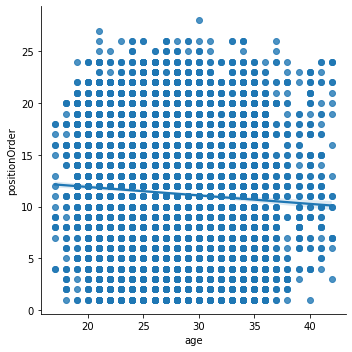

In [27]:
sns.lmplot(x='age',y='positionOrder',data=data)

##### Create Target Column: Finished Top Half<a id="part2f"></a>
shows whether or not the drivers finish top half of their race

In [28]:
#Get half column that shows half of the number of drivers in that race
driverCount=data.groupby('raceId').count()['grid']
halfDriverCount=np.floor(driverCount/2)
half=halfDriverCount.astype('int32').to_dict()
data['half'] = data['raceId'].map(half)

In [29]:
#Create target column
data['topHalf']=np.where(data['positionOrder']<=data['half'],1,0)

In [30]:
#Drop half since it is useless now
data.drop(labels=['half'],inplace=True,axis=1,errors='ignore')

##### Drop unnecessary columns<a id="part2h"></a>

In [31]:
#Drop unnecessary columns
data=data.drop(labels=['resultId','driverId','constructorId','number','positionText','positionOrder','position'
                       ,'statusId','points','season'
                 ,'circuitId','round','statusId','race','cirCountry','constructorNationality'
                 ,'driverNationality','laps','dob','date','finishTime','finishTime(msec)','fastestLapTime'
                       ,'fastestLapSpeed','fastestLap','rank']
          ,axis=1,errors='ignore')

## Step 3: Data Cleansing and Transformation<a id="part3"></a>
[Back to the top](#part0)

- Change \\N to null
- Feature Engineering: Q_best,Q_worse,Q_average
- Missing Value Imputation
- Categorical Data Encoding
- Numerical Transformation
    - Transforming to Normal Distribution
    - Discretization/Binning
- Scaling

### Change \N to null

In [32]:
#Percentage of null values in the columns
#change //N to null
cols=data.columns[data.isin(['\\N']).any()]
print(cols)
data[cols] = data[cols].replace({'\\N':np.nan})

Index(['alt', 'q1', 'q2', 'q3'], dtype='object')


### Feature Engineering: Q_best,Q_worse,Q_average

In [33]:
def qual_time_formatter(time):
    try:
        mins = eval(time[0])
        if time[2] == '0':
            secs = eval(time[3])
        else:
            secs = eval(time[2:4])
        mils = float(time[-4:])
        return((mins*60)+secs+mils)
    except:
        return np.nan

for qual in ['q1', 'q2', 'q3']:
    data[qual] = data[qual].apply(qual_time_formatter)

In [34]:
#Creating the new columns
data['q_best']=data[['q1','q2','q3']].min(axis=1)
data['q_worse']=data[['q1','q2','q3']].max(axis=1)
data['q_avg']=data[['q1','q2','q3']].mean(axis=1)

In [35]:
#Drop unnecessary columns
data.drop(labels=['q1','q2','q3'],axis=1,inplace=True,errors='ignore')

### Cleaning null values 

In [36]:
num_cols = [n for n in data.columns if data[n].dtypes!='O']
cat_cols=data.columns.drop(num_cols)

In [37]:
#Display
temp_df=round(data[num_cols].isnull().sum()/len(data)*100,3)
print("numeric")
print(temp_df[temp_df>0])
temp_df=round(data[cat_cols].isnull().sum()/len(data)*100,3)
print("category")
print(temp_df[temp_df>0])

numeric
q_best     1.577
q_worse    1.577
q_avg      1.577
dtype: float64
category
alt    0.219
dtype: float64


##### Numeric
Since Altitude and q_ columns have very little null values, it is best to do Complete Case Analysis

In [38]:
#We see that the circuit with null value is Losail International circuit
data[data['alt'].isnull()]['circuit'].unique()

array(['Losail International Circuit'], dtype=object)

In [39]:
#Make altitude float data type
data['alt']=data['alt'].astype("float")

In [40]:
#No existing information on Losail International Circuit altitude
data[data['circuit']=='Losail International Circuit']['alt'].unique()

array([nan])

In [41]:
#Since Altitude has very little null values, we can just drop it
data=data.dropna(axis=0, subset=['alt'])

In [42]:
# I Obeserved that race 256 qualifying data was all missing
# While the rest, the qualifying data is only missing for those positioned at the back
test=data[data['q_best'].isnull()]
print("Without race 256:",test[test['raceId']!=256]['qualifyPos'].unique())
print("With race 256:",test['qualifyPos'].unique())

Without race 256: [20 22 21 19 18 17 24 28 23]
With race 256: [20 22 21 19 18 17 24  1 12 13 10 14 23 16  8  9  6  4 11  3  5  7  2 15
 28]


In [43]:
#Race 256 has no q1,q2,q3 records at all
data[data['raceId']==256].head()

,raceId,grid,circuit,alt,location,constructor,driverName,qualifyPos,weather,weather_warm,...,weather_dry,weather_wet,weather_cloudy,driver_home,constructor_home,age,topHalf,q_best,q_worse,q_avg
3326,256,1,Adelaide Street Circuit,58.0,Adelaide,Williams,Damon Hill,1,Sunny[2],0,...,0,0,0,0,0,34.0,1,NaN,NaN,NaN
3327,256,12,Adelaide Street Circuit,58.0,Adelaide,Ligier,Olivier Panis,12,Sunny[2],0,...,0,0,0,0,0,28.0,1,NaN,NaN,NaN
3328,256,13,Adelaide Street Circuit,58.0,Adelaide,Footwork,Gianni Morbidelli,13,Sunny[2],0,...,0,0,0,0,0,26.0,1,NaN,NaN,NaN
3329,256,10,Adelaide Street Circuit,58.0,Adelaide,McLaren,Mark Blundell,10,Sunny[2],0,...,0,0,0,0,0,28.0,1,NaN,NaN,NaN
3330,256,14,Adelaide Street Circuit,58.0,Adelaide,Tyrrell,Mika Salo,14,Sunny[2],0,...,0,0,0,0,0,28.0,1,NaN,NaN,NaN


In [44]:
#We can remove race 256, since it is hard to impute because it is missing entirely
#Removing it will not affect the other data
data=data[data['raceId']!=256]

In [45]:
#We see that all of the missing q1, q2, q3 records are at the last positions of their qualifying race
#This just means that they did not participate in the qualifying race
for i in test['raceId'].unique():
    temp=data[(data['raceId']==i) & (data['q_best'].isnull())]['qualifyPos'].values
    temp.sort()
    print('Missing:'+str(temp))
    print('Last Position:'+str(data[data['raceId']==i]['qualifyPos'].max()))
    

Missing:[20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[21 22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[22]
Last Position:22
Missing:[19 20]
Last Position:20
Missing:[18]
Last Position:18
Missing:[20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[17 18 19 20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[18 19 20]
Last Position:20
Missing:[18 19 20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[18 19 20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[19 20]
Last Position:20
Missing:[20]
Las

#### Complete Case Analysis: Q columns

In [46]:
#Since q_ cols has very little null values, we can just drop it
data=data.dropna(axis=0, subset=['q_best'])

##### Category

In [47]:
data[data['weather']=='not found']['location'].unique()

array(['Nürburg', 'Shanghai', 'Sakhir', 'Spa', 'Sochi', 'Montmeló',
       'Monte-Carlo', 'São Paulo', 'Budapest', 'Monza', 'Marina Bay',
       'Suzuka', 'Austin', 'Mexico City', 'Abu Dhabi', 'Melbourne',
       'Baku'], dtype=object)

In [48]:
#Percentage missing
len(data[data['weather']=='not found'])/len(data)*100

6.042363433667782

##### Code to replace the mode Weather OHE of not found rows with 1

#Add missing value indicator
data['weather_NA']=np.where(data['weather']=='not found', 1, 0)
data.head()

#Look at how the weather are at each of the locaitons
#While looking at which location we have missing data for
temp_df=data
temp_df['not_found']=np.where(temp_df['weather']=='not found',1,0)
temp_df=temp_df.groupby('location').sum()
temp_df[['weather_warm','weather_cold','weather_dry','weather_wet','weather_cloudy','not_found']]

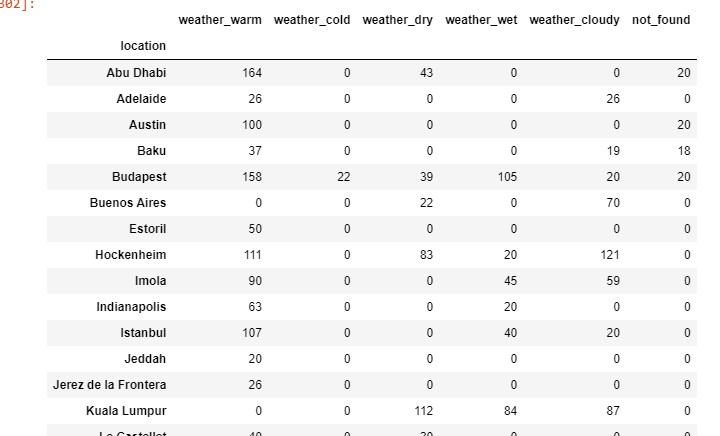

#Check if we have all the locations for the missing values
temp_list=data[data['weather']=='not found']['location'].unique()
n=1
print("number of missing weather Circuit Locations:"+str(len(temp_list)))
for i in temp_list:
    if i in list(temp_df.index):
        print(n)
        n+=1
    else:
        print('no')

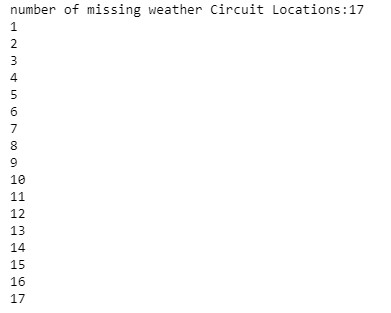

temp_df=temp_df.loc[temp_list][['weather_warm','weather_cold','weather_dry','weather_wet','weather_cloudy','not_found']]

#Replace not found with the mode weather for that circuit's location
to_rep_ind=data[data['weather']=='not found'].index
col_to_use=temp_df.idxmax(axis=1).values
for i in to_rep_ind:
    for n in range(len(temp_df.index)):
        if data.loc[i]['location']==temp_df.index[n]:
            data.loc[i,col_to_use[n]]=1
            break;
data.drop(labels=['weather','not_found','location'],axis=1,inplace=True,errors='ignore')

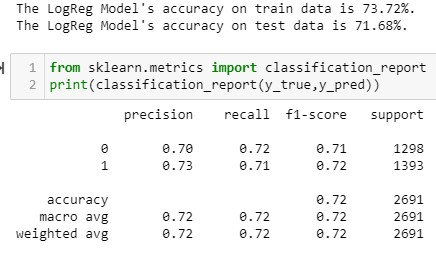

##### Complete Case Analysis

In [49]:
#Clean weather data
data.replace(to_replace='not found',value=np.nan,inplace=True)
data=data.dropna(axis=0, subset=['weather'])

In [50]:
#Drop Weather
data.drop(labels='weather',axis=1,inplace=True,errors='ignore')
data.drop(labels=['weather','location'],axis=1,inplace=True,errors='ignore')

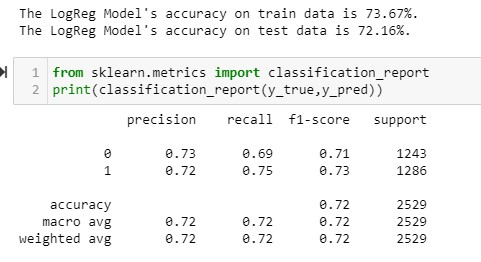

In [51]:
temp_df=round(data.isnull().sum()/len(data),3)
print(temp_df[temp_df>0])

Series([], dtype: float64)


### Dealing with Outliers

In [52]:
num_cols = [n for n in data.columns if data[n].dtypes!='O']
cat_cols=data.columns.drop(num_cols)

In [53]:
#Function to explore the distributuion of variables
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(18, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30,kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Price quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

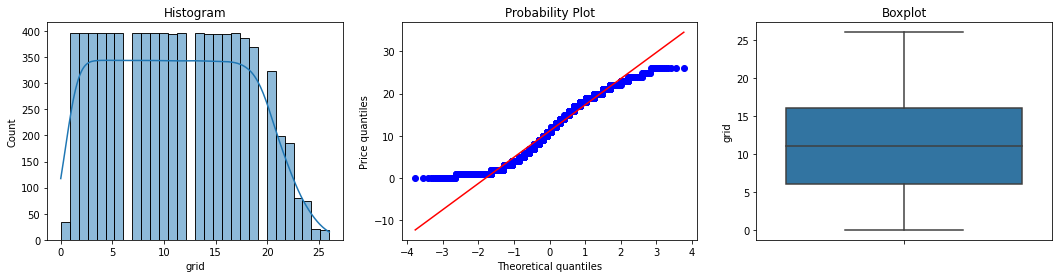

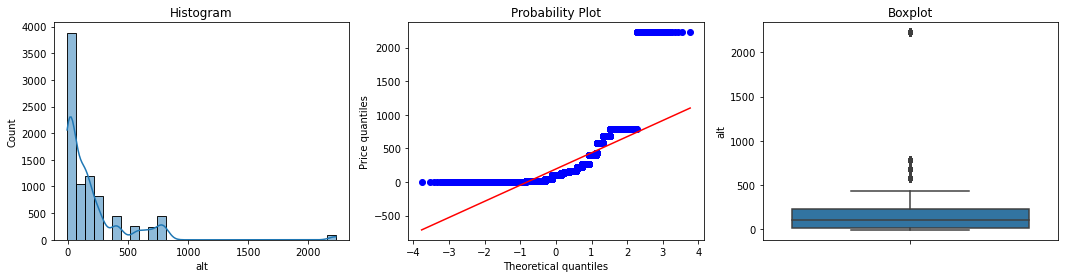

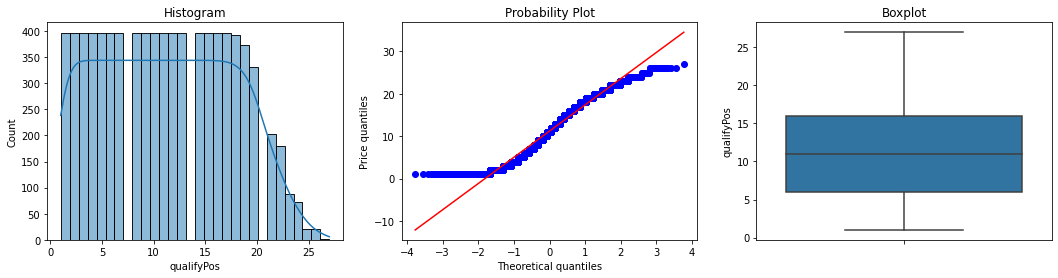

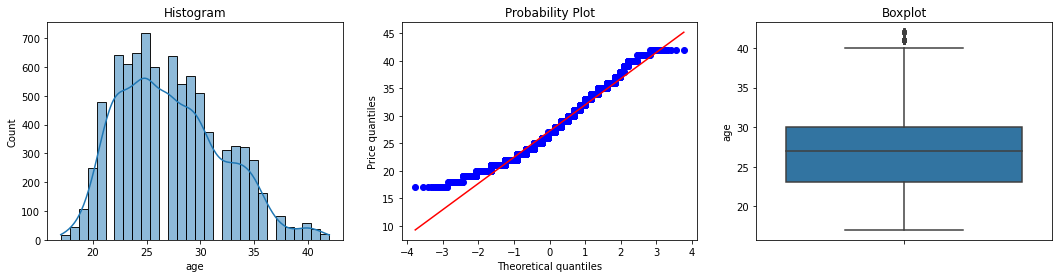

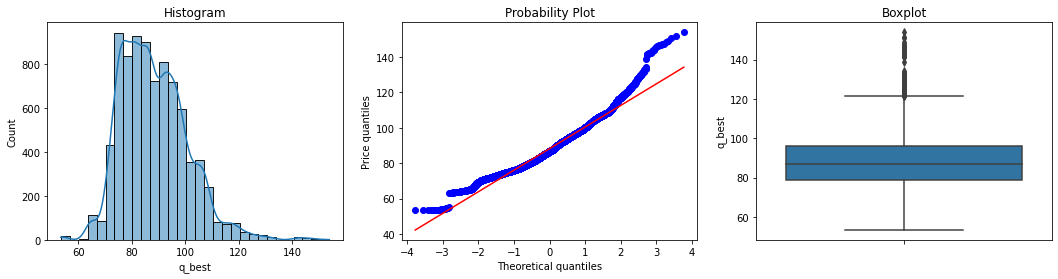

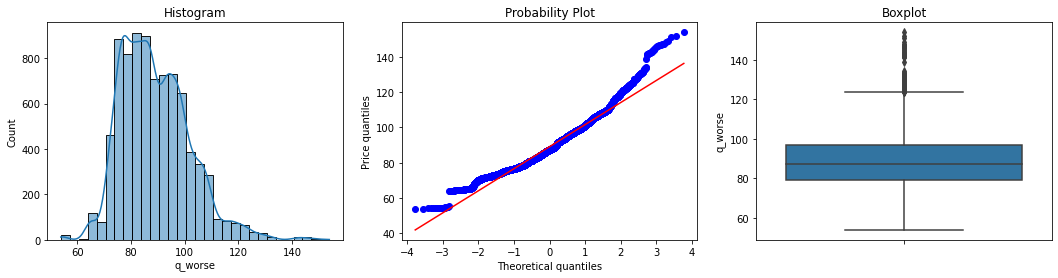

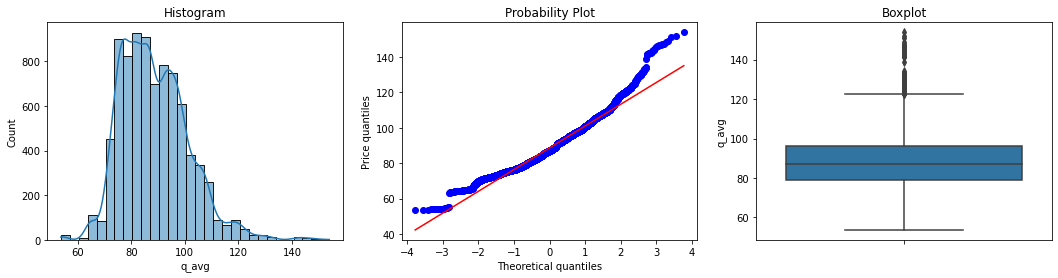

In [54]:
#Non-binary numerical data 
for i in num_cols:
    if (len(data[i].unique())>2) and i not in ['raceId','season']:
        diagnostic_plots(data,i)

##### Without any capping or trimming


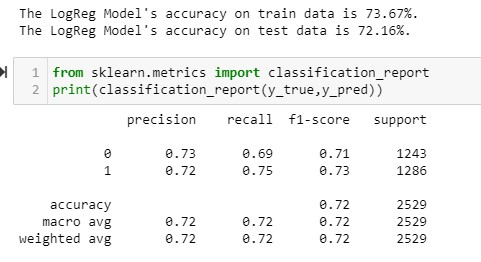

In [55]:
len(data[data['alt']>882])

99

In [56]:
len(data[data['q_best']>150.40224999999995])

3

In [57]:
len(data[data['q_worse']>147.35099999999997])

5

In [58]:
len(data[data['q_avg']>148.55])

4

In [59]:
data.shape

(8428, 19)

#### Winsorization
windsorizer = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['alt','q_best','q_worse','q_avg'])

windsorizer.fit(data)
data = windsorizer.transform(data)

windsorizer.right_tail_caps_

#Non-binary numerical data 
for i in ['alt','q_best','q_worse','q_avg']:
    diagnostic_plots(data,i)

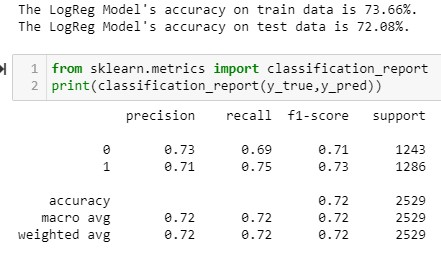

#### Find boundaries via Standard Deviation method (3 SD away from mean)
#Trimming loses 1/8th of the data, so I rather not do it

def find_boundaries(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary
alt_upper_limit, alt_lower_limit = find_boundaries(data, 'alt', 1.5)
outliers_alt = np.where(data['alt'] > alt_upper_limit, True,
                       np.where(data['alt'] < alt_lower_limit, True, False))

data = data.loc[~outliers_alt ]


alt_upper_limit, alt_lower_limit = find_boundaries(data, 'q_best', 1.5)
outliers_q_best = np.where(data['q_best'] > alt_upper_limit, True,
                       np.where(data['q_best'] < alt_lower_limit, True, False))
#Trimming q_best trims the other q_ columns as well
data = data.loc[~outliers_q_best ]
data.shape 

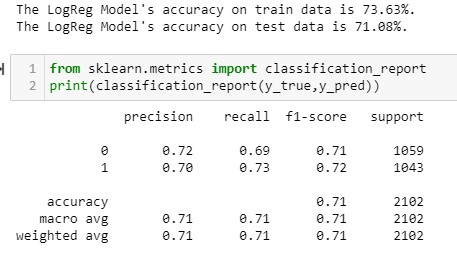

#### Find boundaries via Arbitrary Percentile method

def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary
IV_upper_limit,IV_lower_limit = find_boundaries(data, 'alt')

outliers_RM = np.where(data['alt'] > IV_upper_limit, True,
                       np.where(data['alt'] < IV_lower_limit, True, False))

data = data.loc[~outliers_RM ]
IV_upper_limit,IV_lower_limit = find_boundaries(data, 'q_best')

outliers_RM = np.where(data['q_best'] > IV_upper_limit, True,
                       np.where(data['q_best'] < IV_lower_limit, True, False))

data = data.loc[~outliers_RM ]

data.shape

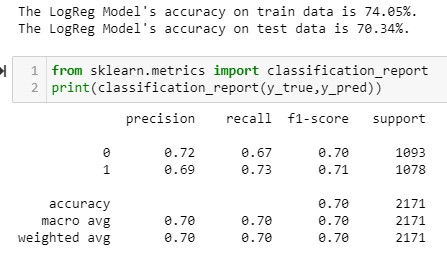

In [60]:
#Drop raceID
data.drop(labels='raceId',axis=1,inplace=True,errors='ignore')

In [61]:
data.shape

(8428, 18)

### Train Test Split

In [62]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('topHalf', axis=1), data['topHalf'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((5899, 17), (2529, 17))

### Categorical Data Encoding

In [63]:
#Drop driver name
X_train.drop(labels='driverName',axis=1,errors='ignore',inplace=True)
X_test.drop(labels='driverName',axis=1,errors='ignore',inplace=True)

In [64]:
num_cols = [n for n in X_train.columns if X_train[n].dtypes!='O']
cat_cols= X_train.columns.drop(num_cols)

In [65]:
#Cardinality
for i in cat_cols:
    print(i+' '+str(len(X_train[i].unique())))

circuit 41
constructor 46


In [66]:
for i in cat_cols:
    print(i+' '+str(len(X_test[i].unique())))

circuit 41
constructor 46


#### One Hot Encoding

In [67]:
#Performing one hot encoding
ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False, 
    variables=['circuit','constructor']
)  

ohe_enc.fit(X_train)
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)


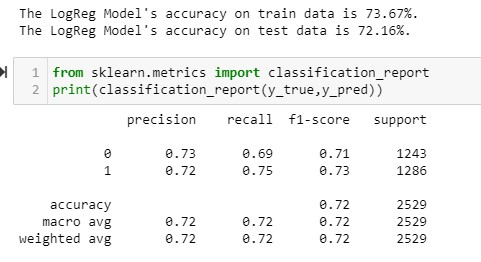

##### One Hot Encoding: Grouping rare Categories

#for encoding using feature-engine
from feature_engine.encoding import RareLabelEncoder

rare_encoder = RareLabelEncoder(tol=0.05)  
rare_encoder.fit(X_train)

#let's transform the train and test sets
X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)

rare_encoder.encoder_dict_

#let's transform train and test sets
ohe_enc = OneHotEncoder(
    
    # we can select which variables to encode
    variables=['circuit','constructor'],
    
    # to indicate if we drop one of the binaries
    drop_last=False) 

ohe_enc.fit(X_train_enc)
X_train_enc = ohe_enc.transform(X_train_enc)
X_test_enc = ohe_enc.transform(X_test_enc)

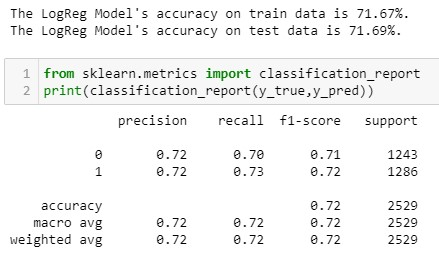

### Numerical Data Transformation

All the transformation worsens the model

##### Without Transformation

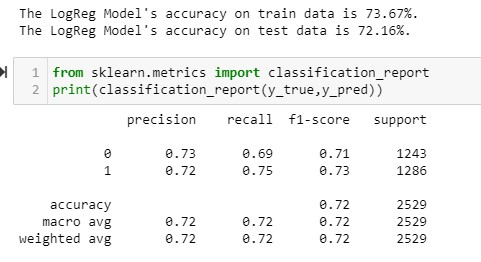

###### Log Transformation

from feature_engine.transformation import LogTransformer
lt = LogTransformer(variables=['q_best','q_worse','q_avg'])

#fit transformer to data set
lt.fit(X_train_enc)
X_train_enc = lt.transform(X_train_enc)
X_test_enc = lt.transform(X_test_enc)

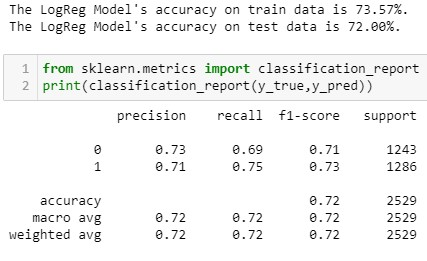

###### Reciprocal Transformation

from feature_engine.transformation import ReciprocalTransformer
rt = ReciprocalTransformer(variables =['q_best','q_worse','q_avg'])

#fit transformer to the entire dataframe
rt.fit(X_train_enc)
X_train_enc = rt.transform(X_train_enc)
X_test_enc = rt.transform(X_test_enc)

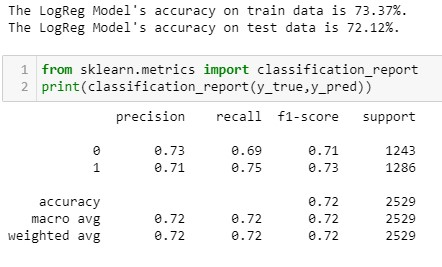

###### Square Cube Root

from feature_engine.transformation import PowerTransformer
et = PowerTransformer(variables = ['q_best','q_worse','q_avg'], exp=1/3) # for cube root

#fit transformer to data 
et.fit(X_train_enc)
X_train_enc = et.transform(X_train_enc)
X_test_enc = et.transform(X_test_enc)

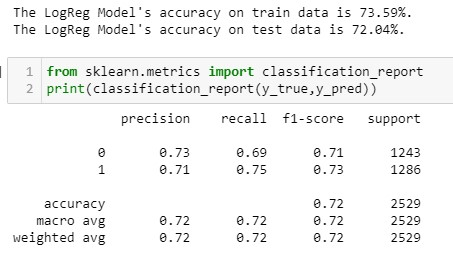

##### Yeo Johnson

yjt = YeoJohnsonTransformer(variables =  ['q_best','q_worse','q_avg'])
yjt.fit(X_train_enc)
X_train_enc = yjt.transform(X_train_enc)
X_test_enc = yjt.transform(X_test_enc)

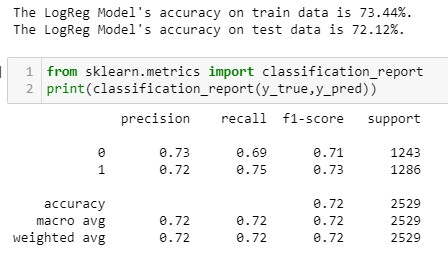

###### Box Cox

bct = BoxCoxTransformer(variables = ['q_best','q_worse','q_avg'])

#fit transformer to the data set
bct.fit(X_train_enc)

X_train_enc= bct.transform(X_train_enc)
X_test_enc = bct.transform(X_test_enc)

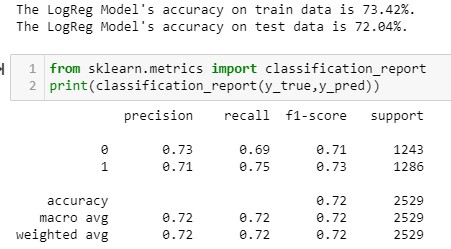

### Discretization

###### Equal Width Discretization

from feature_engine.discretisation import EqualWidthDiscretiser
disc = EqualWidthDiscretiser(bins=10, variables = ['q_best','q_worse','q_avg'])

disc.fit(X_train_enc)
X_train_enc = disc.transform(X_train_enc)
X_test_enc = disc.transform(X_test_enc)

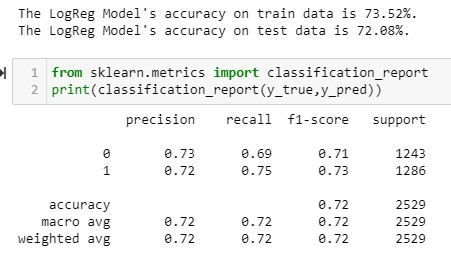

##### Equal Frequency Discretization

from feature_engine.discretisation import EqualFrequencyDiscretiser
disc = EqualFrequencyDiscretiser(q=10, variables =['q_best','q_worse','q_avg'])

disc.fit(X_train_enc)
X_train_enc= disc.transform(X_train_enc)
X_test_enc = disc.transform(X_test_enc)

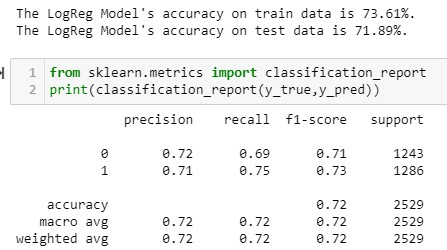

### Scaling

#### Before Scaling

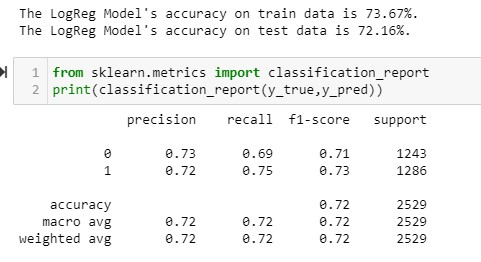

#### standardisation: with the StandardScaler from sklearn

#set up the scaler
scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

#transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train_enc.columns)

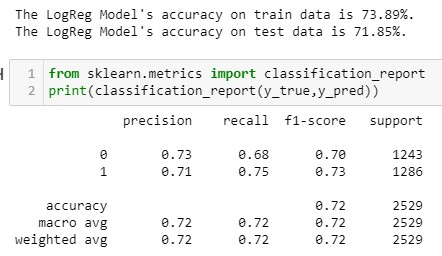

#### Mean Normalization
means = X_train_enc.mean(axis=0)
ranges = X_train_enc.max(axis=0)-X_train_enc.min(axis=0)
#now we are ready to perform mean normalization:
X_train_scaled = (X_train_enc - means) / ranges
X_test_scaled = (X_test_enc - means) / ranges

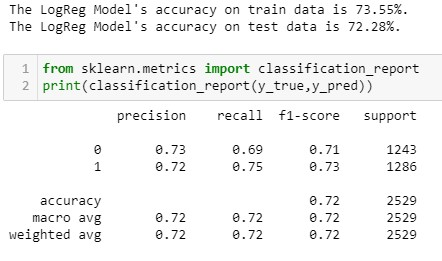

In [68]:
#### MinMax Normalization
scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

#transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

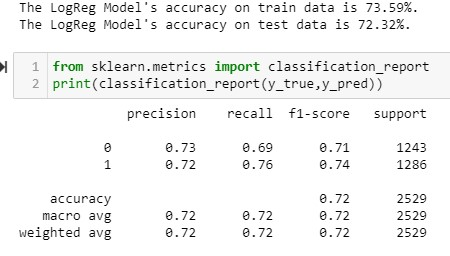

#### Maximum Absolute Scaling
#set up the StandardScaler so that it removes the mean
#but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

#set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

#fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train_enc)
scaler_maxabs.fit(X_test_enc)

#transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train_enc))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test_enc))
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

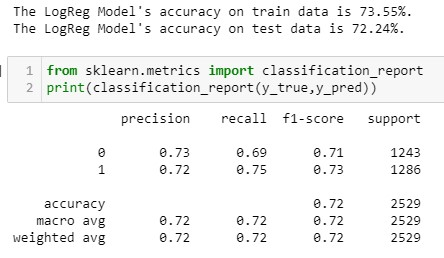

#### Robust Scaler
scaler = RobustScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_enc)

#transform train and test sets
X_train_scaled = scaler.transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_enc.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_enc.columns)

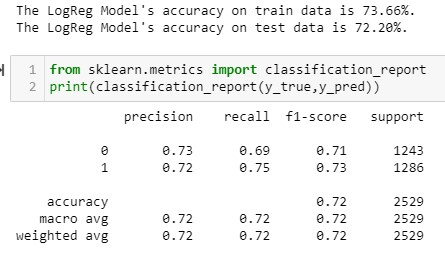

### Step 4: Machine Learning Modelling<a id="part4"></a>
[Back to the top](#part0)
- Naive Baseline Model
- Logistic Regression Model

In [69]:
#We have 8248 rows
data.shape

(8428, 18)

In [70]:
X_train_Fin=X_train_scaled
X_test_Fin=X_test_scaled
#X_train_Fin=X_train_enc
#X_test_Fin=X_test_enc

In [71]:
X_train_Fin.shape

(5899, 101)

In [72]:
X_test_Fin.shape

(2529, 101)

In [73]:
len(data)/len(results)*100

33.18240875625025

#### Naive Baseline model

In [74]:
y_labels = ['topHalf']

In [75]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels}.")

ModeResult(mode=array([0]), count=array([2969]))
The modal class label is 0, and the accompanying string value of this label is ['topHalf'].


In [76]:
y_train_preds_naive = [int(modal_class_label) for row in X_train_Fin.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [77]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_Fin.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [78]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 50.33%.
The Naive Baseline Model's accuracy on test data is 49.15%.


#### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train_Fin, y_train)

LogisticRegression(solver='liblinear')

In [81]:
y_train_preds_logreg = logreg.predict(X_train_Fin)
y_test_preds_logreg = logreg.predict(X_test_Fin)

In [82]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 73.59%.
The LogReg Model's accuracy on test data is 72.32%.


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1243
           1       0.72      0.76      0.74      1286

    accuracy                           0.72      2529
   macro avg       0.72      0.72      0.72      2529
weighted avg       0.72      0.72      0.72      2529



In [84]:
#Most of the constructos shown have very little records
coef=pd.DataFrame(logreg.coef_[0], index=X_test_Fin.columns)
coef['coef']=abs(coef[0])
temp_df=coef.sort_values(by='coef',ascending=False)
temp_df.head(20)

,0,coef
qualifyPos,-3.105875,3.105875
constructor_Ligier,1.860144,1.860144
constructor_Manor Marussia,-1.796233,1.796233
constructor_HRT,-1.776145,1.776145
constructor_Virgin,-1.752709,1.752709
constructor_Lotus,-1.618065,1.618065
constructor_Team Lotus,1.542127,1.542127
constructor_Caterham,-1.539165,1.539165
constructor_Alpine F1 Team,1.458200,1.458200
constructor_Mercedes,1.263792,1.263792


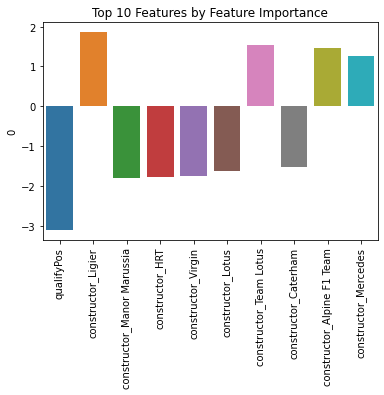

In [85]:
#The constructors are quite rare
coef=pd.DataFrame(logreg.coef_[0], index=X_test_Fin.columns)
coef['coef']=abs(coef[0])
temp_df=coef.sort_values(by='coef',ascending=False).head(10)
sns.barplot(x=temp_df.index,y=0,data=temp_df)
plt.title(label='Top 10 Features by Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [86]:
#The number of observations of the constructors in the top 10 feature importance
for i in coef.sort_values(by='coef',ascending=False).head(10).index[1:]:
    print(len(data[data['constructor']==i[12:]]))

75
75
111
75
76
30
105
40
416


In [87]:
#To compare the number of observations
#They are mostly rare observations
data['constructor'].value_counts()
#we can investigate why the constructors with lesser observations have high feature importance and see 
#if we could improve the model based on what we learned.

Williams          789
Ferrari           784
McLaren           779
Red Bull          590
Sauber            532
Toro Rosso        476
Renault           471
Mercedes          416
Force India       380
Toyota            244
Jordan            229
Minardi           223
Haas F1 Team      189
Lotus F1          144
BMW Sauber        138
Benetton          126
BAR               115
HRT               111
Tyrrell           109
Alfa Romeo        107
Caterham          105
Honda             104
Marussia          101
Jaguar             81
Footwork           76
Lotus              76
Virgin             75
Ligier             75
Super Aguri        75
Manor Marussia     75
AlphaTauri         72
Racing Point       68
Arrows             52
Prost              49
Alpine F1 Team     40
Stewart            40
Forti              39
Pacific            38
Aston Martin       38
Simtek             37
Brawn              34
Spyker             33
Larrousse          30
Team Lotus         30
MF1                26
Spyker MF1

### Report<a id="part9"></a>
[Back to the top](#part0)

#### Introduction with Value Based Problem Statement

Formula 1 racing is one of the most popular and technologically advanced sports in the world right now. Performing well in a race depends on the performance of the car, the driver's talent, and race strategy. No one knows if an accident will occur, and while the driver's skill and the speed of the car can give us an idea of their grid and final positions, we can never really know until the checkered flag falls. Thus, using past data, I will try to understand how certain factors affect how well the driver did in the race. To ensure we have a balanced target variable for our classification model, I will predict whether or not a driver finishes in the top half.

#### Problem Formulation 
[EDA](#eda)
- Load and Explore the Data
- Understand the Data
- Formulate a Prediction Problem

There are 13 tables provided in this assignment with information regarding the races, drivers, constructors, pit stops, results, and more. Before I did any exploration, I created some hypotheses. According to my knowledge of Formula 1, the grid position will significantly affect the driver's position. Other factors I hypothesize that can affect them are the weather, the circuit, the driver's age, and whether they are competing in their home country. With the hypotheses I created, I had a clear idea of which tables I should explore in. However, I had to first get the weather data by web scraping the weather information through the URL in the race table. 

By merging the results and race dataset, I was able to see that we have results of races from 1950 to 2021. The date column has missing values and unclean values that have an additional 1 in front of the actual year itself. Although a total of 20 cars can participate in the Grand Prix, from the bar plot with the number of races by position, we find they have accepted up to 33 cars to participate at times. The position column in the results table contains incorrect values such as /N and 99. The scatterplot of the driver's grid position and their final positioning in the race shows a positive correlation between them, which means the lower their grid position, the higher their chances of placing on the podium. 

For our qualifying table, we have the qualifying results of races from 1994 to 2021. In the bar plot with the number of races by qualifying position, we can see that there are usually only 20 cars involved, but sometimes there can be as many as 28. 

Another thing I wanted to explore was whether age affects the driver's skill to perform well in the race. In order to get the age column, I had to clean the date column to derive the season. From the scatterplot of the driver's age against the driver's position in the race, we find a negative correlation between them, showing that the older the driver, the higher the chance of them performing well in the race. Perhaps the older drivers have more experienced, therefore, giving them a higher chance of winning. 

It piqued my interest, too, which constructors and drivers had the most wins in F1. Based on the bar chart, we can see that Lewis Hamilton, Michael Schumacher, and Sebastian Vettel have won the most races. Ferrari has won the most races among constructors, followed by McLaren and Mercedes.

I also checked the weather table by creating a bar plot showing the top 40 weather conditions based on the number of races. There are a lot of weather conditions of the races that are not found based on the chart. We also see that most of the Formula one races happened during sunny and dry weather. 

At first, I wanted to predict who will the race. However, that would lead to an imbalanced target variable leading to a biased prediction model. Therefore, I changed my prediction problem to predicting if the driver will end up in the top half of their Formula one race.

#### Data Wrangling on multiple tables
[To the code section](#part2)
- Extract and Create features from different tables
- Concatenate, Merge or Join the tables

Having explored the data and gained more insight into Formula 1, I identified the tables I would use to make my predictions. The results table is a must-use to know how well each driver did in each race. As I wanted every row in the results table, I left-merged the other tables with it to gain more informative columns. The tables I used are Results, Races, Circuits, Constructors, Drivers, Qualifying, and Weather.

By merging the race table with the results, I obtained the names, dates, and locations(circuitId) of Formula 1 races. Before merging the tables, I had to clean the invalid years within the date column of the races table. Based on a comparison between the year in the URL and the date in the table, I realized that the year value in the date column has 1 in front of the actual year. To fix it, I just identified the dates with incorrect year values and replaced them. Following that, I extracted the year to create the season column, from which I will derive the driver's age. Due to the null values in the date column, the season column also had missing values. Thus, I had to extract the year from the URL in the Races table to replace it. 

Since most of the columns in the different tables have the same name, merging them will result in a messy dataset. In order to have a unique name for some columns, I renamed them before combining the tables. To get the driver's full name, I combined their forename and surname into one column.

For the weather data, there are a lot of values that could be generalized. I created a dictionary with the keys being warm, cold, dry, wet, and cloudy. The dictionary values include words that have a similar or identical meaning to the key. 

With all that done, I can then merge the tables. As I included the qualifying table, which only contains information from 1994 to 2021, it led to losing a significant amount of results data from 1950 to 1993. With lesser data, it leads to higher estimation variance and hence worse predictive performance. Furthermore, the more data there is, the higher the chance it contains useful information. Therefore, I had a hard time considering whether to include the Qualifying table or not. Before every Formula 1 race, there are qualifying rounds to determine the order in which the cars will start. The fastest qualifier gets to start at the front of the grid, while the slowest qualifier starts at the back. It is crucial to qualify towards the front of the grid since each grid position is 8 meters apart, with a 16-meter gap between the first and third. Since the grid position is so critical, we know that every driver or constructor is trying their darnedest to win the qualifying rounds. Based on just the qualifying rounds, we can pretty much tell which driver has a better car, which increases their chances of winning. Therefore, I decided to merge the Qualifying table. 

With the tables merged, I am able to create new columns like driver home and constructor home, which show whether they are competing in their home country. To do so, I mostly needed to take the first three characters of the driver's or constructor's nationality and check if it was identical to the circuit country column. However, there were some exceptions like British, American, and Spanish, where I had to just manually change the circuit country to the first three characters of the mentioned nationality. I created these columns as I wanted to see if there were advantages of racing in your home country which could be due to the psychological impact that fans have on drivers, as well as driving near home in a familiar environment.

The next feature I created was the age column which provides information on the driver's age in that season. In order to do so, I just subtracted the season with the driver's date of birth.

Previously where I explored the data with data visualizations, I noticed values such as \N and position 99 in the position column. As we have two other position columns, Position Order and Position Text, I wanted to see if they had the same issue. Position Text, however, included values such as R, D, N, W, F, and E in addition to position 99. The alphabetic values mentioned actually mean something. In the data dictionary provided, we learn that D stands for disqualified, E for excluded, F for failed to qualify, N for not classified, R for retired, and W for withdrew. Furthermore, I realized that all the \N values in the position column appear due to the alphabetic values in the Position Text.

My first step was to investigate Position 99, where I found that the drivers occupying these positions earned the most points in those races. Therefore, I could just replace Position 99 with 1.

When it came to dealing with the /N values in position, I had difficulty deciding between two solutions. One solution was to use the positions in the Position Order column instead. However, I was unsure if they would be valid entries since we do not know whether they got disqualified before or after the race. Alternatively, I could filter out drivers who are disqualified, excluded, failed to qualify, retired, and withdrew. However, this would lead to losing a large number of rows. A large chunk of data has already been lost due to merging with the Qualifying table, so I am reluctant to remove more rows from the table. As a result, I settled on using the Position Order column as mentioned in the first solution. 

The last feature I created was my target column, which shows whether the driver finishes in the top half. In order to do this, I calculated the number of drivers for each race and labeled the drivers with positions below half the number of drivers as 1 and the rest as 0.

Lastly, I dropped all the unnecessary columns that I do not need.


#### Data Cleansing and Transformation
[To the code section](#part3)
- Missing Value and Outliers
- Categorical Data
- Numerical Data
- Others

For missing value imputation, the first step was to identify the columns with values such as \N and not found, which are altitude, weather, q1, q2, and q3, and replace the values with null. For Q1, Q2, and Q3, I created columns such as Q_best, Q_worse, and Q_avg. Doing so helps deal with most of the null values in Q1, Q2 and Q3. These columns show their best, worse and average qualifying time that they are involved in, in seconds. Then I dropped Q1, Q2, and Q3 since we no longer needed them. Winning the qualifying race allows the top drivers to determine their position in the top spots on the 20-car starting grid. In racing circuits where overtaking can be difficult, being in the front will free them from traffic, allowing them to get a better start. Therefore, most drivers and constructors will try to win the qualifying race. Based on the qualifying round, we can roughly see which driver has the faster car. Although the grid position shows this, it does not indicate how fast the person ahead is. Thus, I created the Q_best, Q_worse, and Q_avg columns.

Before I started on missing value imputation, I first had to change the altitude column data type from object to float. From analyzing the data, we find that the Q_best, Q_worse, and Q_avg columns have 1.6% missing, the altitude column has 0.2% missing, and the weather column has 5.9% missing. For the altitude column, I found that we do not have any such data for the Losail International Circuit. It is apparent that the causes of the missing data, in terms of altitude, are unrelated to the data. Thus, they are said to be missing completely at random (MCAR). Furthermore, we have very few null values for altitude, so it is advisable to perform a Complete Case Analysis. Since this results in deleting an entire race, removing null values in the altitude column will not affect any other data.

For the qualifying columns, I found out that we do not have any records on Q1, Q2, and Q3 for the race with the identification 256. I felt that it would be difficult to impute the missing values as it has to follow the order according to the qualifying position. Otherwise, it will not make any sense. Therefore, I felt that the most suitable method is to remove race 256 since doing so will not affect any other parts of the data. As for the remaining missing values, they all appear at the last qualifying position. There is a possibility that this is because they were not able to participate in the qualifying event. Although if they do not get to qualify, they are still able to compete in the Grand Prix. But, replacing the values so they still show they took longer to finish the race if they had a higher qualifying position will be difficult. Therefore, my current solution is to remove the null values. Since they are all in the last position and there are few null values, removing them does not impact the data much.

The weather data has the most missing value, although only 5.9% are missing. Using group-by, I was able to see the frequency of the weather OHE columns for each location. From this, I saw most locations tend to have a certain type of weather. Therefore, I thought it was reasonable to replace the OHE column value with the missing weather data based on the mode weather observed in the group-by. As a best practice, I also added a missing value indicator for the weather column. However, replacing this value with the mode value resulted in my train accuracy being much higher than my test accuracy which could lead to overfitting. Therefore, I used Complete Case Analysis instead, which gave a slightly worse train accuracy but a much higher test accuracy. Not only that, it is also much simpler and faster to implement. Since it only removes the races that do not have the weather data and we only have little missing data, it will not impact the data significantly.

For outliers, I used box plots to identify the columns with outliers. The graph showed that Q_best, Q_worse, Q_avg, and altitude have a bunch of outliers. I have tried trimming based on the boundaries found via the standard deviation method and Arbitrary Percentile method and also capped the outliers with Winsorization. Cutting the data according to the standard deviation and Arbitrary Percentile method negatively affected the performance of the model and reduced at least 1/8th of the rows. Winsorization also worsens the model's performance. Therefore, I decided not to deal with the outliers.

After performing the train test split, I started doing the categorical encoding. There are two categories to encode, circuit and constructor have a cardinality of 41 and 46 respectively in both train and test data. Both columns do not have any monotonic relationship, so we cannot implement ordinal encoding. Label encoding could not be used as it would give our model incorrect information about our data. As there will be different numbers in the same column, it will make the model misunderstand the data to be in some kind of order, 0 < 1 < 2. Another method is target mean encoding, which uses information about the target. Doing so causes target leakage, and the model overfits the training data leading to unreliable validation and lower test scores. Hence, we can only do one hot encoding, although it should not be used for high-cardinality categories since it may consume a lot of memory and a large number of features in the dataset. To combat this, I tried one hot encoding while grouping rare categories. This encodes the values with the percentage of observations below 5% to rare. Other benefits also include making the algorithm less prone to overfitting. However, it not only performed poorly compared to one hot encoding, but it also led to the test accuracy being greater than the train accuracy, which is not what should happen. Thus, I will only be using one hot encoding.

For numerical data, I have tried applying Logarithm, Reciprocal, Power, Box-Cox, and Yeo Johnson transformations on Q_best, Q_worse, and Q_avg since they were still slightly skewed. Doing so will help reduce the skewness. However, all the transformation methods led to the model performance worsening. I also tried variable discretization, which minimizes the influence of outliers and in turn, improves the model. With Equal Width Discretization, the number of intervals/bins is decided arbitrarily, and the width is determined by the range of values and the number of bins to be created. Equal Frequency Discretization divides the values of the variable into intervals that carry the same proportion of observations. However, both methods also led to the model performance worsening. Thus, I will not be performing any of them.

Doing feature scaling allows features to be within a similar scale. This allows us to compare feature importance and help algorithms converge faster, thus improving performance. Machine learning algorithms are usually sensitive to the scale and magnitude of the features, and features with a higher range of values tend to dominate over smaller ranges.

One method I tried is standardization, which subtracts the mean from each observation and divides the result by the standard deviation. By doing so, the variable centers at zero, and the variance is standardized to 1. Standardization improves train accuracy, but worsens test accuracy.

Another method I tried was Mean Normalization, which subtracts the mean from each observation, and divides the results by the difference between the minimum and maximum values. Doing so centers the variable at zero and rescales the distribution to the value range. This results in a distribution centered at 0, with its minimum and maximum values falling within the range of -1 to 1. Mean Normalization worsens the train accuracy but improves the test accuracy.

I also tried MinMax Normalization, which subtracts all observations by the minimum value and divides the result by the value range, which is the difference between maximum and minimum values. Doing so scales the variables to their minimum and maximum values and squeezes their values between 0 and 1. With MinMax Normalization, the train accuracy slightly worsens while the test accuracy improves.

Also, I tried maximum absolute scaling. This is done by dividing every observation by the maximum value of the variable to scale the data to its maximum value. Doing so produces a distribution with values varying between -1 and 1. With Maximum Absolute Scaling, the train accuracy worsens, but the test accuracy improves slightly.

Lastly, I tried robust scaling, which scales the variables to the median and quantiles by removing the median value from observations and dividing them by the interquartile range (IQR). IQR refers to the range between the 25th and 75th quantiles or, in other words, between the 1st and 3rd quartiles. With Robust scaling, the train accuracy slightly worsens and the test accuracy slightly improves.

After comparing the results, I decided to use MinMax Normalization since it performed better than the others.


#### Machine Learning Model
[To the code section](#part4)
- Show Count of Rows and Columns
- Build and Evaluate the model against a Naïve Baseline Model

For my final dataset, there are 8429 rows and 17 columns. When split into the train and test data, the train has 5900 rows, and the test has 2529 rows. After transforming and changing parts of the data, we now have 101 columns for the train and test data sets. Previously in the results table, we had 25399 rows that consisted of data from 1950 to 2021. After merging with qualifying, which only has data on 1994 to 2021, and removing missing values, we have 33.2% of the results data remaining. 

A naive baseline model and a logistic regression model are used to predict the top half of the drivers based on information gathered before the race. We first create the naive baseline model as it is simple to build but usually has poor performance as it is the benchmark. Based on the results of the naive baseline model, we can compare other models' performance with it. If our new model did better than the baseline model, we know we are on the right track. For this assignment, the naive baseline model will typically predict the modal class for every single prediction. For my final data, the baseline model has an accuracy of 50.33% for the train data and 49.15% for the test data.

Since we are predicting whether the driver makes it to the top half, we are solving a classification problem. Thus, I decided to use logistic regression, which helps solve classification problems where we predict discrete categories. We cannot use a linear regression model here as it will lead to probabilities below 0 as the predicted values can exceed 1 and 0. A linear regression model can be transformed into a Logistic Regression model by placing it in a sigmoid function, which takes in any value and returns a value between 0 and 1. Logistic regression predicts the probability of an event occurring, in this case, top half or not top half, based on the dataset of independent variables, which are our X_train and X_test data frames. Based on the final dataset, the Logistic Regression Model has an accuracy score of 73.59% for the train data and 72.32% for the test data. Additionally, I added a classification report, which is used to evaluate the quality of the classification model's predictions. The report will show the main classification metrics like precision, recall, and f1-score on a per-class basis. It uses True positives, False Positives, True negatives, and False Negatives to predict the metrics of a classification report. Precision shows what percent of the predictions are correct. Recall shows the ratio of true positives to the sum of true positives and false negatives. F1-score shows the percentage of positive predictions that were correct. 

Since we have scaled our data, we can use coefficients to check for feature importance. By looking at the Top 10 Features by Feature importance bar chart, we see that the most important feature is the qualifying position. It shows that when the drivers do better in the qualifying race, the higher the chance they are placed in the top half. This illustrates how crucial qualifying races are and how drivers should care more about it in their Formula 1 strategy to do well. However, we do see constructors with small numbers of observations appearing in the top 10 features by feature importance graph, which I think should be investigated. 

#### Summary and Further Improvements
- Summarize your findings
- Explain the possible further improvements

For this assignment, I have created some hypotheses on which features will affect the driver's chances of being placed in the top half. One of my hypotheses has been proved slightly correct so far, namely whether grid position will be a big factor. As in the Feature Importance section, we see that the Qualifying position was the most crucial feature, and we know that it decides their grid position. Because we have so few missing values, I performed Complete Case Analysis. It is also much simpler and faster to implement. For dealing with outliers, capping and trimming worsened the model's performance. Thus, I will be leaving them as they are. For categorical encoding for circuit and constructor columns, I used One Hot Encoding as it has the fewest drawbacks. However, I did try rare encoding with One Hot Encoding to deal with those drawbacks. But it performed poorly compared to one hot encoding and led to the test accuracy being better than the train accuracy. In terms of numerical transformations, none of them improved the model's performance. Thus, I will not be using them. For feature engineering, I have added information on the weather, driver's age, and the best, worse and average timing of the driver's qualifying time. Furthermore, I added a target column to indicate whether a driver is positioned in the top half of the chart. Lastly, I  also performed MinMax scaling, which performed better compared to the other scaling methods.

We can make further improvements by further experimenting with different combinations of the encoding or transformation methods and selecting the best combination. We could also find better methods of imputing the missing values instead of just removing them. We can look into the availability of more granular hourly weather data, which we can use. Lastly, we can investigate why the constructors with lesser observations have high feature importance and see if we could improve the model based on what we learned.



### Code used to get weather data
#Code used to get weather information
#Since the code will take quite long to run I saved the dataset as a .csv
from selenium import webdriver

weather = races.iloc[:,[0,1,2]]

info = []

#read wikipedia tables

for link in races.url:
    print(link)
    try:
        df = pd.read_html(link)[0]
        if 'Weather' in list(df.iloc[:,0]):
            n = list(df.iloc[:,0]).index('Weather')
            info.append(df.iloc[n,1])
        else:
            df = pd.read_html(link)[1]
            if 'Weather' in list(df.iloc[:,0]):
                n = list(df.iloc[:,0]).index('Weather')
                info.append(df.iloc[n,1])
            else:
                df = pd.read_html(link)[2]
                if 'Weather' in list(df.iloc[:,0]):
                    n = list(df.iloc[:,0]).index('Weather')
                    info.append(df.iloc[n,1])
                else:
                    df = pd.read_html(link)[3]
                    if 'Weather' in list(df.iloc[:,0]):
                        n = list(df.iloc[:,0]).index('Weather')
                        info.append(df.iloc[n,1])
                    else:
                        driver = webdriver.Chrome()
                        driver.get(link)

                        # click language button
                        button = driver.find_element_by_link_text('Italiano')
                        button.click()
                        
                        # find weather in italian with selenium
                        
                        clima = driver.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        info.append(clima) 
                                
    except:
        info.append('not found')

#append column with weather information to dataframe  
  
weather['weather'] = info

#Save the file as csv
weather.to_csv('./datasets/f1db_csv_mod/weather.csv', index=False)
